# Homework 5

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Problem 1

Problem 1: The Lotka–Volterra equations
The Lotka–Volterra equations are a mathematical model of predator–prey interactions between
biological species. Let two variables x and y be proportional to the size of the populations of
two species, traditionally called “rabbits” (the prey) and “foxes” (the predators). You could
think of x and y as being the population in thousands, say, so that x = 2 means there are 2000
rabbits. Strictly the only allowed values of x and y would then be multiples of 0.001, since you
can only have whole numbers of rabbits or foxes. But 0.001 is a pretty close spacing of values,
so it’s a decent approximation to treat x and y as continuous real numbers so long as neither
gets very close to zero.
In the Lotka–Volterra model the rabbits reproduce at a rate proportional to their popula-
tion, but are eaten by the foxes at a rate proportional to both their own population and the
population of foxes:
dx
dt = αx − βxy,
where α and β are constants. At the same time the foxes reproduce at a rate proportional the
rate at which they eat rabbits—because they need food to grow and reproduce—but also die of
old age at a rate proportional to their own population:
dy
dt = γxy − δy,
where γ and δ are also constants.

a) Write a program to solve these equations using the fourth-order Runge–Kutta method for
the case α = 1, β = γ = 0.5, and δ = 2, starting from the initial condition x = y = 2.
Have the program make a graph showing both x and y as a function of time on the same
axes from t = 0 to t = 30. (Hint: Notice that the differential equations in this case do not
depend explicitly on time t—in vector notation, the right-hand side of each equation is a
function f (r) with no t dependence. You may nonetheless find it convenient to define a
Python function f(r,t) including the time variable, so that your program takes the same
form as other programs given in Newman’s Chapter 8. You don’t have to do it that way,
but it can avoid some confusion. Several of the following exercises have a similar lack of
explici

In [3]:
#Function from class:
def rk4(function,a,b,N):
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    x = 0.0
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
    return xpoints, tpoints

But we have a system of equations. We need to adapt them.

for:

$\frac{dx}{dt} = f_x(x,y,t)$

$\frac{dy}{dt} = f_y(x,y,t)$

we express:

$\frac{dr}{dt} = f(r,t)$

$r(t+h) = r(t) + h \frac{dr}{dt} = r(t) + h f(r,t)$

In [4]:
A = 1
B = G = 0.5
D = 2

def fx(x,t,y):
    return ((A*x)-(B*x*y))

def fy(x, t, y):
    return (G*x*y - D*y)

In [5]:
def f(r,t):
    x = r[0]
    y = r[1]
    
    Fx = fx(x,t,y)
    Fy = fy(x,t,y)
    
    return np.array([Fx,Fy], float)

In [6]:
N=1000
a = 0
b = 30
h = (b-a)/N

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []

r = np.array([2.0,2.0], float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    
    r+= (1/6)*(k1+ 2*k2 + 2*k3 + k4)

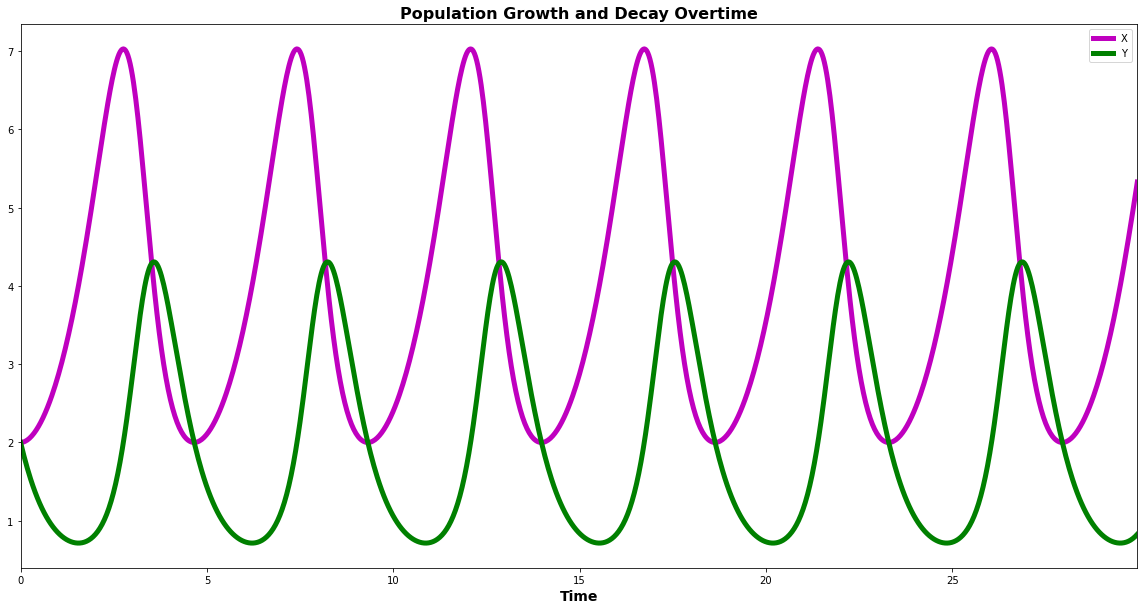

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(tpoints, xpoints, label = 'X', c = 'm', lw = 5)
plt.plot(tpoints, ypoints, label = 'Y', c = 'g', lw = 5)
plt.xlabel('Time')
plt.title('Population Growth and Decay Overtime')
plt.xlim(0,29.95)
plt.legend();

b) Describe

This is a population of predators and prey animals. When there are too many predators, the prey population shrinks and this lack of food then shrinks the predator population. With less predators the prey population can increase, and the predator population then increases due to the larger food supply. The cycle repeats and we can see this hapening in the graph.

# Problem 2

Problem 2: Vibration in a one-dimensional system
Let’s study the motion of a system of N identical masses (in zero gravity) joined by identical
linear springs like this:
1
As shown in Newman’s Example 6.2, the horizontal displacements ξi of masses i = 1 . . . N
satisfy equations of motion
m d2ξ1
dt2 = k(ξ2 − ξ1) + F1,
m d2ξi
dt2 = k(ξi+1 − ξi) + k(ξi−1 − ξi) + Fi ,
m d2ξN
dt2 = k(ξN−1 − ξN ) + FN.
where m is the mass, k is the spring constant, and Fi is the external force on mass i. Example 6.2
shows how these equations could be solved by guessing a form for the solution and using a
matrix method. Here we’ll solve them more directly.
Write a program to solve for the motion of the masses using the fourth-order Runge–Kutta
method, where m = 1 and k = 6, and the driving forces are all zero except for F1 = cos ωt with
ω = 2. Plot your solutions for the displacements ξi of all the masses as a function of time from
t = 0 to t = 20 on the same plot. Write your program to work with general N, but test it out
for small values—N = 5 is a reasonable choice.
You will need first of all to convert the N second-order equations of motion into 2N first-
order equations. Then combine all of the dependent variables in those equations into a single
large vector r to which you can apply the Runge–Kutta method in the standard

I dont like the squiglies so I'm using xs:

$m \frac{d^2x_1}{dt^2} = k(x_2 - x_1) + F_1$

$m \frac{d^2x_i}{dt^2} = k(x_{i+1} - x_i) + k(x_{i-1} - x_i)+ F_i$

$m\frac{d^2 x_N}{dt^2} = k(x_{N-1} - x_N) + F_N$

We need to convert the two second order equations each to two seperate first order equations to solve.

for the ith mass:

$m \frac{d^2x_i}{dt^2} = k(x_{i+1} - x_i) + k(x_{i-1} - x_i)+ F_i$

$\frac{d^2x_i}{dt^2} =\frac{1}{m}( k(x_{i+1} - x_i) + k(x_{i-1} - x_i)+ F_i)$


Generally, we have the equation form:

$\frac{d^2 x_i}{dt^2} = f(x_i, \frac{dx_i}{dt}, t)$

but our equation instead needs to be adapted to the form:

$\frac{d^2 x_i}{dt^2} = f(x_i, x_{i+1}, x_{i-1}, t)$

We can try following example 8.6:

let 
$\frac{dx_i}{dt} = \omega$


New system of equations:

$\frac{dx_i}{dt} = \omega$

$\frac{d\omega}{dt} = \frac{1}{m}( k(x_{i+1} - x_i) + k(x_{i-1} - x_i)+ F_i)$

Similarly for the Nth particle:


$\frac{dx_N}{dt} = \omega$

$\frac{d\omega}{dt} = \frac{1}{m}( k(x_{N-1} - x_N) + F_N)$

In [14]:
def Fi(i, t):
    if i == 1:
        return np.cos(w*t)
    else:
        return 0
    
def f(r,t, i, Nmass, xnext, xlast):
    xi = r[0]
    omega = r[1]
    ftheta = omega
    
    F = Fi(i, t)
    if i == Nmass:
        fomega = (1/m)*(k*(xlast-xi)+F)
    elif i ==1:
        fomega = (1/m)*(k*(xnext-xi)+F)
    else:
        fomega = (1/m)*(k*(xnext-xi)+k*(xlast-xi)+F)
    
    return np.array([ftheta, fomega], float)

def rk(a, b, h, f, i, r, Nmass, xnext, xlast):
    tpoints = np.arange(a, b, h)
    xpoints = []
    ypoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])

        k1 = h*f(r,t, i, Nmass, xnext, xlast)
        k2 = h*f(r+0.5*k1, t+0.5*h, i, Nmass, xnext, xlast)
        k3 = h*f(r+0.5*k2, t+0.5*h, i, Nmass, xnext, xlast)
        k4 = h*f(r+k3, t+h, i, Nmass, xnext, xlast)

        r+= (1/6)*(k1+ 2*k2 + 2*k3 + k4)
    return xpoints

This problem is not clear at all about what it expects for the initial positions of the masses. There are 2 possibilities.

1. The masses all begin at the origin (all have an inital position of 0)

This seems to be what the problem is leaning towards, but it is not physically possible and not very intuitive. I will first plot this situation.

2. All the masses start at some arbitrary distance from eachother.

This is a case I think makes much more sense. I will plot this second.

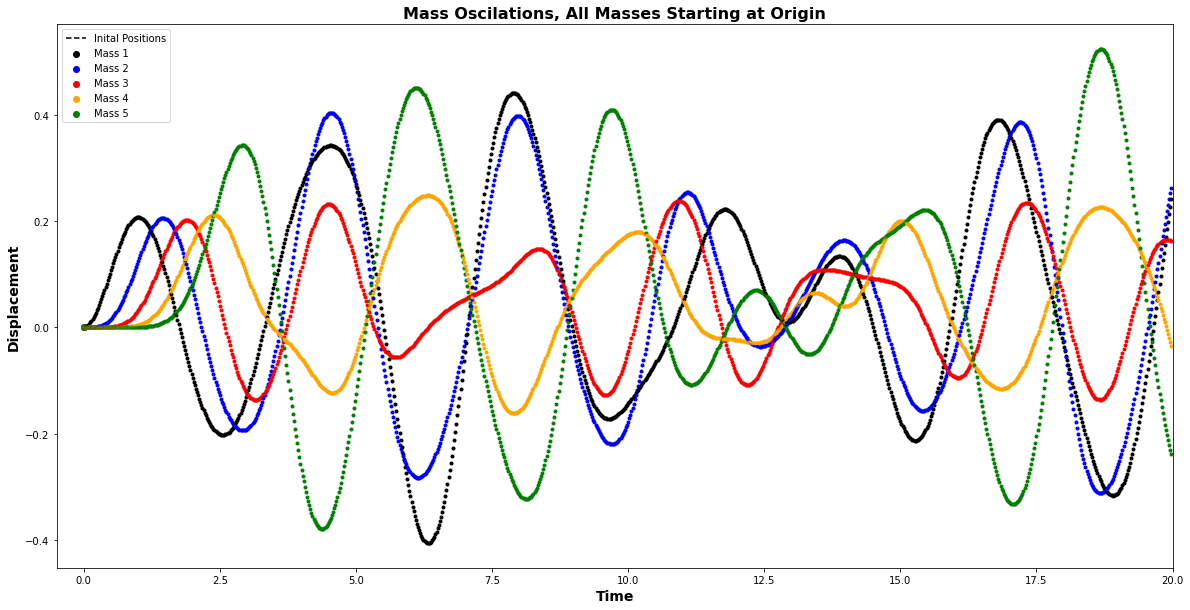

In [28]:
plt.rcParams['figure.figsize'] = (20, 10)

m = 1
k = 6
w = 2

N=1000
a = 0
b = 20
h = (b-a)/N
Nmass = 5


j = -1

tpoints = np.arange(a, b, h)
xpoints = []

positions = []

last_mass_positions = np.zeros(5)
positions.append(last_mass_positions)

for t in tpoints:
    j+=1
    mass_pos = []
    for i in range(1, Nmass+1):
        if j ==0:
            if i == 1:
                xlast = 0
                xnext = last_mass_positions[i]
            elif i == Nmass:
                xlast = last_mass_positions[i-2]
                xnext = 0
            else:
                xlast = last_mass_positions[i]
                xnext = last_mass_positions[i-2]
                
            r = np.array([last_mass_positions[i-1],0.0], float)
        else:
            if i == 1:
                xlast = 0
                xnext = last_mass_positions[i][0]
            elif i == Nmass:
                xlast = last_mass_positions[i-2][0]
                xnext = 0
            else:
                xlast = last_mass_positions[i][0]
                xnext = last_mass_positions[i-2][0]
                
            r = last_mass_positions[i-1]

        mass_pos.append(r)

        k1 = h*f(r,t, i, Nmass, xnext, xlast)
        k2 = h*f(r+0.5*k1, t+0.5*h, i, Nmass, xnext, xlast)
        k3 = h*f(r+0.5*k2, t+0.5*h, i, Nmass, xnext, xlast)
        k4 = h*f(r+k3, t+h, i, Nmass, xnext, xlast)
        
        r+= (1/6)*(k1+ 2*k2 + 2*k3 + k4)
    last_mass_positions = mass_pos
    positions.append(mass_pos)
    
    b1 = mass_pos[0]
    b2 = mass_pos[1]
    b3 = mass_pos[2]
    b4 = mass_pos[3]
    b5 = mass_pos[4]
    
    plt.plot(t, b1[0], marker = '.', c = 'k')
    plt.plot(t, b2[0], marker = '.', c = 'b')
    plt.plot(t, b3[0], marker = '.', c = 'r')
    plt.plot(t, b4[0], marker = '.', c = 'orange')
    plt.plot(t, b5[0], marker = '.', c = 'green')

plt.title('Mass Oscilations, All Masses Starting at Origin')
plt.scatter(0, 0, c = 'k', label = 'Mass 1')
plt.scatter(0, 0, c = 'b', label = 'Mass 2')
plt.scatter(0, 0, c = 'r', label = 'Mass 3')
plt.scatter(0, 0, c = 'orange', label = 'Mass 4')
plt.scatter(0, 0, c = 'green', label = 'Mass 5')
plt.xlim(-0.5, 20)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.plot( 0, 0, c = 'k', linestyle = '--', label = 'Inital Positions')
plt.legend();

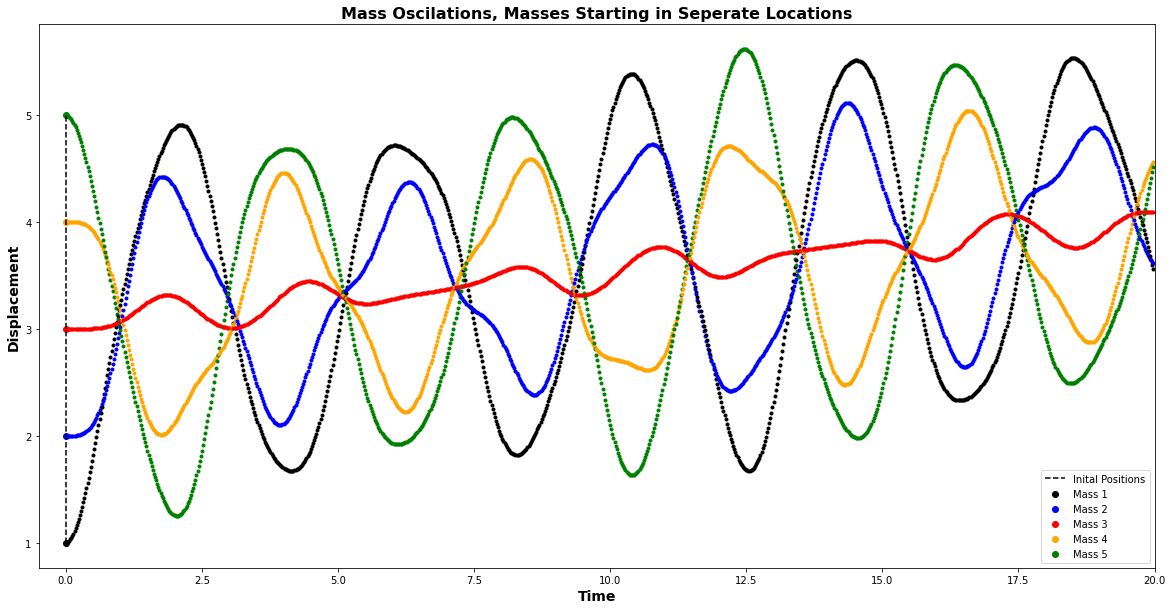

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)

m = 1
k = 6
w = 2

N=1000
a = 0
b = 20
h = (b-a)/N
Nmass = 5

j = -1

tpoints = np.arange(a, b, h)
xpoints = []

positions = []

last_mass_positions = np.arange(1,Nmass+1)
positions.append(last_mass_positions)

for t in tpoints:
    j+=1
    mass_pos = []
    for i in range(1, Nmass+1):
        if j ==0:
            if i == 1:
                xlast = 0
                xnext = last_mass_positions[i]
            elif i == Nmass:
                xlast = last_mass_positions[i-2]
                xnext = 0
            else:
                xlast = last_mass_positions[i]
                xnext = last_mass_positions[i-2]
                
            r = np.array([last_mass_positions[i-1],0.0], float)
        else:
            if i == 1:
                xlast = 0
                xnext = last_mass_positions[i][0]
            elif i == Nmass:
                xlast = last_mass_positions[i-2][0]
                xnext = 0
            else:
                xlast = last_mass_positions[i][0]
                xnext = last_mass_positions[i-2][0]
                
            r = last_mass_positions[i-1]

        mass_pos.append(r)

        k1 = h*f(r,t, i, Nmass, xnext, xlast)
        k2 = h*f(r+0.5*k1, t+0.5*h, i, Nmass, xnext, xlast)
        k3 = h*f(r+0.5*k2, t+0.5*h, i, Nmass, xnext, xlast)
        k4 = h*f(r+k3, t+h, i, Nmass, xnext, xlast)
        
        r+= (1/6)*(k1+ 2*k2 + 2*k3 + k4)
    last_mass_positions = mass_pos
    positions.append(mass_pos)
    
    #Wow the rest of this code is structured so strangely. Why did Kelcey write it like this?
    #Excellent question. For some reason if I were to prit the object b1 here, it would print the 
    #correct value. However, if I were to append it to a list defined outside of the time loop I would
    #only get the very last value for b1 and no other values. I spent hours messing with this in an attempt
    #to fix the problem and ultimately gave up and plotted it like this and now here we are. If you were to print 
    # out the variable "positions" you would see what I mean.
    
    #I also know that TECHNICALLY plotting it like this makes it non-general for N masses but the problem
    #only specifies that the code that ends here at line 61 be generalized so I would argue that this is fine.
    
    b1 = mass_pos[0]
    b2 = mass_pos[1]
    b3 = mass_pos[2]
    b4 = mass_pos[3]
    b5 = mass_pos[4]
    
    plt.plot(t, b1[0], marker = '.', c = 'k')
    plt.plot(t, b2[0], marker = '.', c = 'b')
    plt.plot(t, b3[0], marker = '.', c = 'r')
    plt.plot(t, b4[0], marker = '.', c = 'orange')
    plt.plot(t, b5[0], marker = '.', c = 'green')

plt.title('Mass Oscilations, Masses Starting in Seperate Locations')
plt.scatter(0, 1, c = 'k', label = 'Mass 1')
plt.scatter(0, 2, c = 'b', label = 'Mass 2')
plt.scatter(0, 3, c = 'r', label = 'Mass 3')
plt.scatter(0, 4, c = 'orange', label = 'Mass 4')
plt.scatter(0, 5, c = 'green', label = 'Mass 5')
plt.xlim(-0.5, 20)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.plot([0, 0, 0, 0, 0], [1, 2, 3, 4, 5], c = 'k', linestyle = '--', label = 'Inital Positions')
plt.legend();

# Problem 3

Problem 3: Oscillating chemical reactions
The Belousov–Zhabotinsky reaction is a chemical oscillator, a cocktail of chemicals which, when
heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to
oscillate between two extremes. You can add an indicator dye to the reaction which changes
color depending on the concentrations and watch the mixture switch back and forth between
two different colors for as long as you go on heating the mixture.
Physicist Ilya Prigogine formulated a mathematical model of this type of chemical oscilla-
tor, which he called the “Brusselator” after his home town of Brussels. The equations for the
Brusselator are dx
dt = 1 − (b + 1)x + ax2y, dy
dt = bx − ax2y.
Here x and y represent concentrations of chemicals and a and b are positive constants.
Write a program to solve these equations for the case a = 1, b = 3 with initial conditions
x = y = 0, to an accuracy of at least δ = 10−10 per unit time in both x and y, using the adaptive
Bulirsch–Stoer method described in Newman’s Section 8.5.6. Calculate a solution from t = 0
to t = 20, initially using a single time interval of size H = 20. Allow a maximum of n = 8
modified midpoint steps in an interval before you divide in half and try again.
Make a plot of your solutions for x and y as a function of time, both on the same graph, and
have your program add dots to the curves to show where the boundaries of the time intervals
lie. You should find that the points are significantly closer together in parts of the solution
where the variables are changing rapidly.
2
Hint: The simplest way to do this calculation is to make use of recursion, the ability of a
Python function to call itself. Write a user-defined function called, say, step(r,t,H) that takes
as arguments the vector r = (x, y) at a starting time t and an interval length H, and returns the
new value of r at time t + H. This function should perform the modified midpoint/Richardson
extrapolation calculation described in Newman’s Section 8.5.5 until either the calculation con-
verges to the required accuracy or you reach the maximum number n = 8 of modified midpoint
steps. If it fails to converge in eight steps, have your function call itself, twice, to calculate sep-
arately the solution for the first then the second half of the interval from t to t + H, something
like this:
r1 = step(r,t,H/2)
r2 = step(r1,t+H/2,H/2)
(Then these functions can call themselves, and so forth, subdividing the interval as many times
as necessary to reach the required accuracy

$\frac{dx}{dt} = 1 - (B+1)x + A x^2 y$

$\frac{dy}{dt} = Bx - Ax^2y$

In [ ]:
A = 1

B = 3

x = y = 0
error = 1e-10

a = 0
b=20
h=20

In [ ]:
def step(r,t,H):
    error = 
    
    while error < 
    return step(r,t,H)

In [ ]:
r1 = step(r,t,H/2)
r2 = step(r1,t+H/2,H/2)

# Problem 4 

Problem 4: Consider the following simple model of an electronic capacitor, consisting of two
flat metal plates enclosed in a square metal box:10 cm 6 cm
+1 V −1 V
0 V
2 cm 6 cm 2 cm
For simplicity let us model the system in two dimensions. Using any of the methods we have
studied, write a program to solve Laplace’s equation and calculate the electrostatic potential in
the box on a grid of 100 × 100 points, where the walls of the box are at voltage zero and the two
plates (which are of negligible thickness) are at voltages ±1 V as shown. Have your program
calculate the value of the potential at each grid point to a precision of 10−6 volts and then make
a density plot of the result.
Hint: Notice that the capacitor plates are at fixed voltage, so they are part of the boundary
condition in this case: the capacitor plates behave the same way as the walls of the box, with
potentials that are fixed at a certain value and cannot change

Laplace's equations:

$E = -\nabla \phi$

$\nabla ^2 \phi = 0$

* square is 10cm x 10cm = 0.1m x 0.1m

In [29]:
10 *1e-2 *u.m

<Quantity 0.1 m>

# Problem 5

Problem 5: Thermal diffusion in the Earth’s crust
A classic example of a diffusion problem with a time-varying boundary condition is the diffu-
sion of heat into the crust of the Earth, as surface temperature varies with the seasons. Suppose
3
the mean daily temperature at a particular point on the surface varies as:
T0(t) = A + B sin 2πt
τ ,
where τ = 365 days, A = 10◦C and B = 12◦C. At a depth of 20 m below the surface almost all
annual temperature variation is ironed out and the temperature is, to a good approximation,
a constant 11◦C (which is higher than the mean surface temperature of 10◦C—temperature
increases with depth, due to heating from the hot core of the planet). The thermal diffusivity
of the Earth’s crust varies somewhat from place to place, but for our purposes we will treat it
as constant with value D = 0.1 m2 day−1.
Write a program, or modify one of the ones given in this chapter, to calculate the tempera-
ture profile of the crust as a function of depth up to 20 m and time up to 10 years. Start with
temperature everywhere equal to 10◦C, except at the surface and the deepest point, choose
values for the number of grid points and the time-step h, then run your program for the first
nine simulated years, to allow it to settle down into whatever pattern it reaches. Then for the
tenth and final year plot four temperature profiles taken at 3-month intervals on a single graph
to illustrate how the temperature changes as a function of depth

In [203]:
tao = 365*24*60*60*u.s
A=10
B=12
depth = 20
D = 0.1*(u.m**2/u.s)/24*60*60

In [204]:
#Taking a year to be 365 days because it looks like if I don't values in the problem will be thrown off.
tenyr = 10*365*24*60*60*u.s
#ten_range = np.arange(0,tenyr.value, 365*24*60*60)
ten_range = np.arange(0,10)
Ts = []
ds = []
for year in ten_range:
    T0= A+B*(np.sin(2*np.pi*year))
    Ts.append(T0)
    D = 0.1* depth **2
    d = D/year
    ds.append(d)

<ipython-input-204-24cb0e50e0b5>:11: RuntimeWarning: divide by zero encountered in divide
  d = D/year


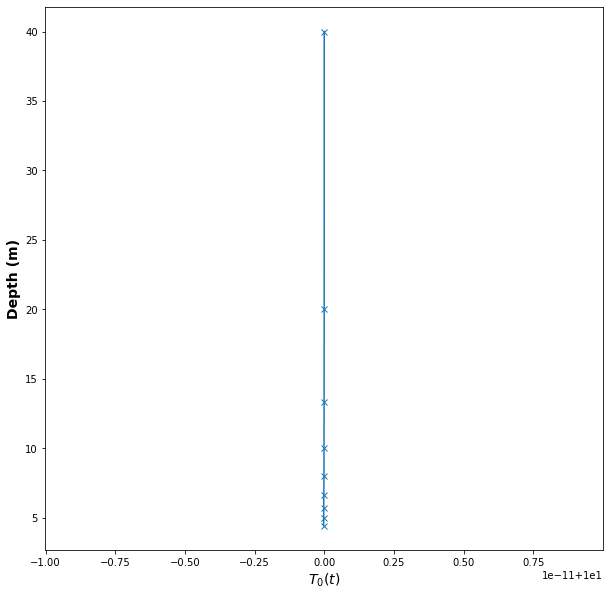

In [211]:
plt.plot(Ts,ds, marker = 'x')
plt.xlabel('$T_0 (t)$')
plt.ylabel('Depth (m)');

# Problem 6

